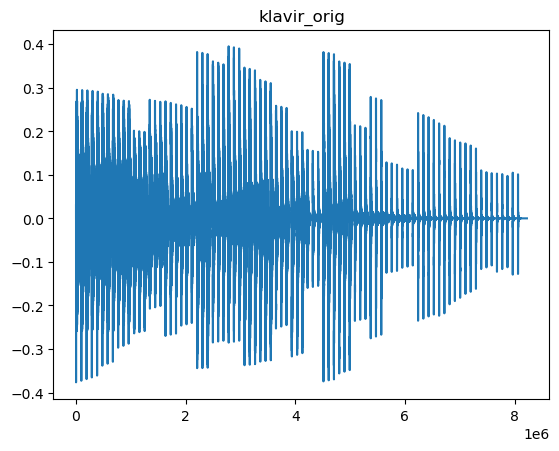

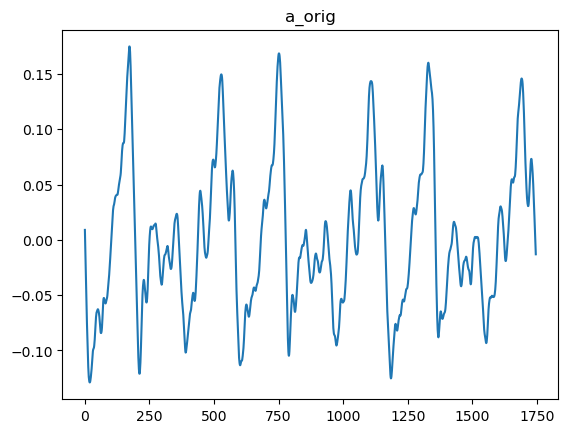

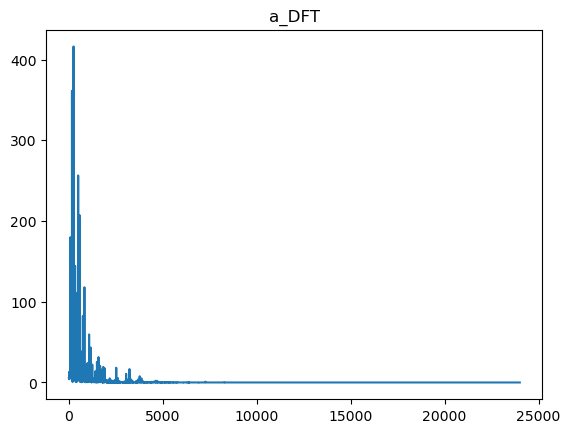

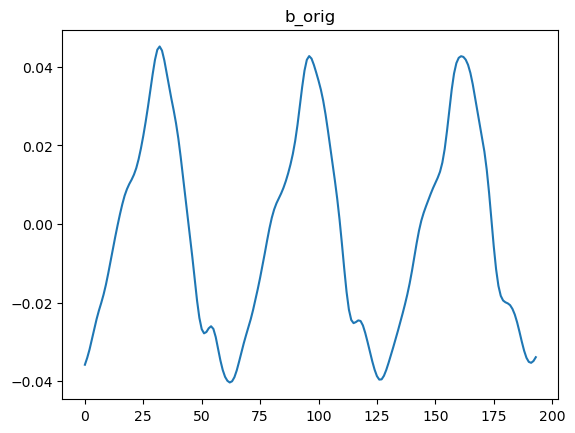

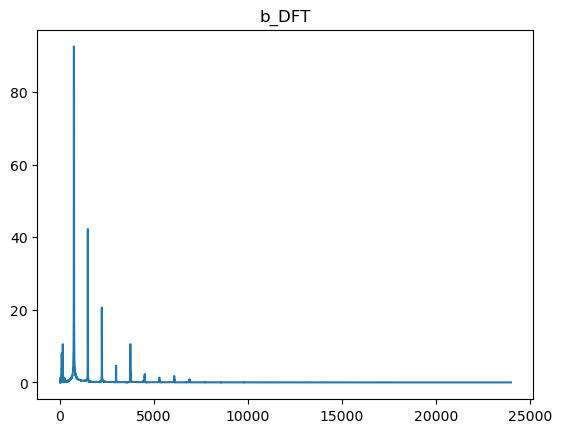

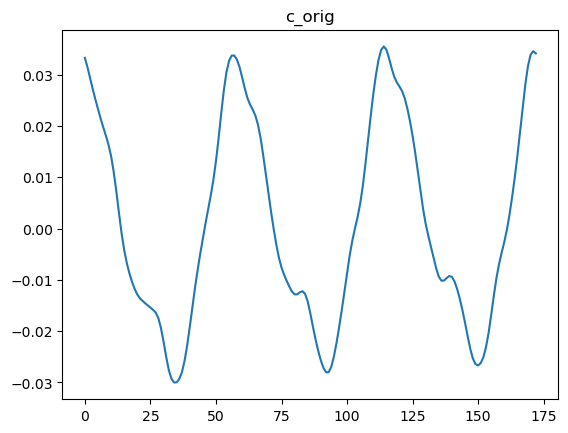

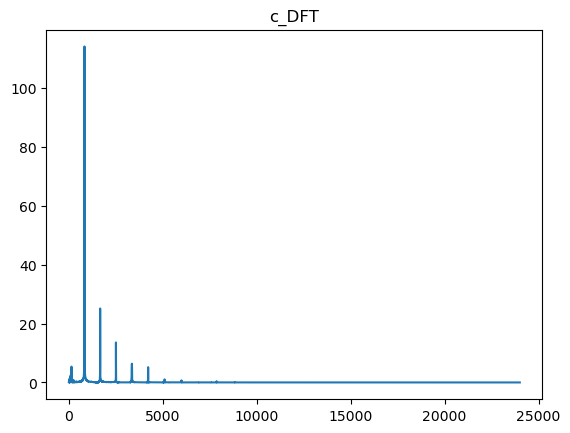

In [24]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import soundfile as sf
MIDIFROM = 24
MIDITO = 108
SKIP_SEC = 0.25
HOWMUCH_SEC = 0.5
WHOLETONE_SEC = 2
howmanytones = MIDITO - MIDIFROM + 1
tones = np.arange(MIDIFROM, MIDITO+1)
s, Fs = sf.read("../audio/klavir.wav")

plt.title('klavir_orig')
plt.plot(s)
plt.show()
N = int(Fs * HOWMUCH_SEC)
Nwholetone = int(Fs * WHOLETONE_SEC)

LENGTH = int(HOWMUCH_SEC*Fs)

SKIP = int(SKIP_SEC*Fs)

MIDI_A = 40
MIDI_A_F = 82.41
MIDI_B = 78
MIDI_B_F = 739.99
MIDI_C = 80
MIDI_C_F = 830.61

#MIDI A
start = Nwholetone*(MIDI_A-MIDIFROM) + SKIP
plt.title('a_orig')
TONE_A = s[start:start+LENGTH]
sf.write('../audio/a_orig.wav', TONE_A, Fs)
plt.plot(TONE_A[0:int(3*Fs/MIDI_A_F)])
plt.show()

#MIDI A DFT
TONE_A_DFT = np.fft.fft(TONE_A)
TONE_A_DFT = np.abs(TONE_A_DFT)
TONE_A_DFT = TONE_A_DFT[:TONE_A_DFT.size//2]
F = np.arange(TONE_A_DFT.size) * Fs / TONE_A.size
plt.title('a_DFT')
plt.plot(F[0:], TONE_A_DFT[0:])
plt.show()

#MIDI B
start = Nwholetone*(MIDI_B-MIDIFROM) + SKIP
plt.title('b_orig')
TONE_B = s[start:start+LENGTH]
sf.write('../audio/b_orig.wav', TONE_B, Fs)
plt.plot(TONE_B[0:int(3*Fs/MIDI_B_F)])
plt.show()

#MIDI B DFT
TONE_B_DFT = np.fft.fft(TONE_B)
TONE_B_DFT = np.abs(TONE_B_DFT)
TONE_B_DFT = TONE_B_DFT[:TONE_B_DFT.size//2]
F = np.arange(TONE_B_DFT.size) * Fs / TONE_B.size
plt.title('b_DFT')
plt.plot(F[0:], TONE_B_DFT[0:])
plt.show()

#MIDI C
start = Nwholetone*(MIDI_C-MIDIFROM) + SKIP
plt.title('c_orig')
TONE_C = s[start:start+LENGTH]
sf.write('../audio/c_orig.wav', TONE_C, Fs)
plt.plot(TONE_C[0:int(3*Fs/MIDI_C_F)])
plt.show()

#MIDI C DFT
TONE_C_DFT = np.fft.fft(TONE_C)
TONE_C_DFT = np.abs(TONE_C_DFT)
TONE_C_DFT = TONE_C_DFT[:TONE_C_DFT.size//2]
F = np.arange(TONE_C_DFT.size) * Fs / TONE_C.size
plt.title('c_DFT')
plt.plot(F[0:], TONE_C_DFT[0:])
plt.show()





In [25]:
i = 0
text = ["TONE A", "TONE B", "TONE C"]
for TONE in [TONE_A, TONE_B, TONE_C]:
    corr = np.correlate(TONE, TONE,"full")
    peak1 = scipy.signal.find_peaks(corr[corr.size//2:], max(corr[corr.size//2:])/2)[0][0]
    peak2 = scipy.signal.find_peaks(corr[corr.size//2:], max(corr[corr.size//2:])/2)[0][1]
    print("Fundamental freq. f0 of",text[i],"is:", 1/(peak2-peak1)*Fs)
    i = i+1

Fundamental freq. f0 of TONE A is: 82.47422680412372
Fundamental freq. f0 of TONE B is: 738.4615384615385
Fundamental freq. f0 of TONE C is: 842.1052631578947


In [14]:
xall = np.zeros((MIDITO+1, N)) # matrix with all tones - first signals empty,
# but we have plenty of memory ...
samplefrom = int(SKIP_SEC * Fs)
sampleto = samplefrom + N
for tone in tones:
    x = s[samplefrom:sampleto]
    x = x - np.mean(x) # safer to center ...
    xall[tone,:] = x

    DFT = np.fft.fft(x);


    samplefrom += Nwholetone
    sampleto += Nwholetone